In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 2.}$



Consider the problem $\min_{\mathbf{x}} q(\mathbf{x}) = 1000(x_2-x_1^2)^2 + (2-x_1)^2$. 


Using the similar approach that we use in the earlier question, we will calculate the value of the diagonal matrix $D_k$ as follows.

$Hessian = \nabla^2f(x) = \begin{bmatrix} \frac{\partial^2f}{\partial x_1^2} & \frac{\partial^2f}{\partial x_1 x_2} \\  \frac{\partial^2f}{\partial x_1 x_2} & \frac{\partial^2f}{\partial x_2^2}  \end{bmatrix}  = \begin{bmatrix}1000[12x_1^2-4x_2]+2 & -4000x_1 \\ -4000x_1 & 2000\end{bmatrix}$

Now the matrix $D^k$ will be the inverse of the diagonal elements of the hessian matrix. and can be found as follows.
 
 $ \\ $


$D^k = \begin{bmatrix}1000[(12x_1^2-4x_2)+2]^{-1} & 0 \\ 0 & 2000^{-1}\end{bmatrix}$

# *General Code for evalf, evalg, compute D, condition number, finding step length and find_minimizer*



$\textbf{NOTE:} \ $ In this notebook we will create an additinal function, ***compute_D_k_diag***, which we will use to compute the diagonal matrix $D^k$ that will be used only in the first part of the question. For the rest of the part where $D^k$ is the inverse of the hessian matrix, we will use the general function, ***compute_D_k***

In [ ]:

def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return 1000*(x[1] - x[0]**2 )**2 + (2 - x[0])**2
  


def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([ 1000*(4*x[0]**3 - 4*x[0]*x[1])+ 2*x[0]-4 , 1000*(2*x[1] - 2*x[0]**2 )  ])
  

def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  return np.array([
                   [1000*(12*x[0]**2 - 4*x[1])+2 , -4000*x[0]  ],
                   [-4000*x[0], 2000]
                   ])

#method to find the condition number of any square matrix
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]

  return np.linalg.eig(A)[0][0] / np.linalg.eig(A)[0][1]


def compute_D_k_diag(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  return np.array([
                   [1/(evalh(x)[0][0]),0],
                   [0, 1/(evalh(x)[1][1])]
                   ])
  


def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2

  if np.linalg.det(evalh(x)) == 0:
    print('The determinant of the hessian is zero. Hence we find Pseudo Inverse')
    return np.linalg.pinv(evalh(x))
  else:
    return np.linalg.inv(evalh(x))





#def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  #assert type(gradf) is np.ndarray and len(gradf) == 2 
  #assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  #step_length = (np.dot(gradf.T, gradf)) / (np.matmul(gradf.T,np.matmul(2*A,gradf)))
  #return step_length
  


def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 

  alpha = alpha_start
  p = -gradf

  while (evalf(x + alpha*p) > (evalf(x) + gamma * alpha * np.dot(gradf.T, p)) ):
    alpha = alpha*rho
  
  return alpha
  

def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 

  alpha = alpha_start
  p = -gradf

  while (evalf(x + alpha*np.matmul(direction,p)) > (evalf(x) + gamma * alpha * np.matmul(gradf.T, np.matmul(direction, p))) ):
    alpha = alpha*rho
  
  return alpha
  

#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3
  
  
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 

  #A = np.array([])
  x = start_x
  g_x = evalg(x)
  k = 0
  condition_num = []

  if (line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2] 

  while np.linalg.norm(g_x) > tol:

    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x,A)

    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma)

    elif line_search_type == CONSTANT_STEP_LENGTH: 
      step_length = float(input('Enter a valid value for the constant step length.'))

    else:  
      raise ValueError('Line search type unknown. Please check!')

    condition_num.append(find_condition_number(evalh(x)))
    x = np.subtract(x, np.multiply(step_length,g_x)) 
    k += 1 
    g_x = evalg(x)

  return x, k, condition_num



 
def find_minimizer_gdscaling_with_diagonal_d(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
 
  x = start_x
  g_x = evalg(x)
  k = 0
  
 
  if (line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2] 
    cond_num_list = []
 
  while np.linalg.norm(g_x) > tol:
 
    #if line_search_type == EXACT_LINE_SEARCH:
      #step_length = #step_length using exact line search with sclaing
 
    d = compute_D_k_diag(x)
    cond_num_list.append(find_condition_number(d))

    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x,g_x, d , alpha_start,rho, gamma)
 
    #elif line_search_type == CONSTANT_STEP_LENGTH: 
      #step_length = float(input('Enter a valid value for the constant step length.'))
 
    else:  
      raise ValueError('Line search type unknown. Please check!')
 
    x = np.subtract(x, step_length * np.matmul(d,g_x)) 
    k += 1 
    g_x = evalg(x)
 
  return x, k, cond_num_list
 
 

def find_minimizer_gdscaling(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
 
  x = start_x
  g_x = evalg(x)
  k = 0
  
 
  if (line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2] 
    cond_num_list = []
 
  while np.linalg.norm(g_x) > tol:
 
    #if line_search_type == EXACT_LINE_SEARCH:
      #step_length = #step_length using exact line search with sclaing
 
    d = compute_D_k(x)
    cond_num_list.append(find_condition_number(d))

    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x,g_x, d , alpha_start,rho, gamma)
 
    #elif line_search_type == CONSTANT_STEP_LENGTH: 
      #step_length = float(input('Enter a valid value for the constant step length.'))
 
    else:  
      raise ValueError('Line search type unknown. Please check!')
 
    x = np.subtract(x, step_length * np.matmul(d,g_x)) 
    k += 1 
    g_x = evalg(x)
 
  return x, k, cond_num_list



# ***Part 1-4:*** Comparing BLS with scaling to BLS withour scaling using the algorith and and diagonal matrix D and the following value.

$x  = (5.0, 5.0) \ \ \ \ \ , \tau = 10^{-9} \ \ \ , \alpha = 1.0 \ \ \ \rho = \gamma = 0.5$

In [ ]:
my_start_x = np.array([5.0, 5.0])
my_tol = 10e-9
alpha = 1.0
rho = 0.5
gamma = 0.5


x_bls, k_bls, cond_num_bls = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma)
x_bls_scaling_inv_d, k_bls_scaling_inv_d, cond_num_inv_d = find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha, rho, gamma)
x_bls_scaling, k_bls_scaling, cond_num = find_minimizer_gdscaling_with_diagonal_d(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha, rho, gamma)

print('BLS Without Scaling')
print('Optimal X :', x_bls)
print('Optimal f(x) :', evalf(x_bls))
print('Iterations :', k_bls)

print('\n\n')

print('BLS With Scaling where D is inverse of hessian')
print('Optimal X :', x_bls_scaling_inv_d)
print('Optimal f(x) :', evalf(x_bls_scaling_inv_d))
print('Iterations :', k_bls_scaling_inv_d)

print('\n\n')

print('BLS With Scaling with Diagonal D')
print('Optimal X :', x_bls_scaling)
print('Optimal f(x) :', evalf(x_bls_scaling))
print('Iterations :', k_bls_scaling)
print(cond_num)



BLS Without Scaling
Optimal X : [2.00000002 4.00000008]
Optimal f(x) : 4.2101662624943547e-16
Iterations : 391800



BLS With Scaling where D is inverse of hessian
Optimal X : [2. 4.]
Optimal f(x) : 0.0
Iterations : 50



BLS With Scaling with Diagonal D
Optimal X : [2.00000001 4.00000004]
Optimal f(x) : 9.479821147279898e-17
Iterations : 698612


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



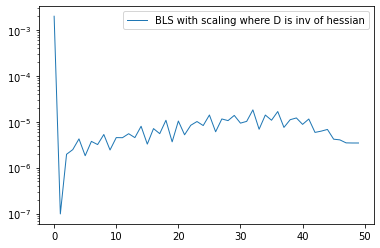

In [ ]:
#plt.plot(cond_num_bls, label='BLS without scaling')
plt.plot(cond_num_inv_d,linewidth=1, label='BLS with scaling where D is inv of hessian')
plt.legend()
plt.xlabel('Iterations')
plt.ylaabel('Condition Number')
plt.yscale('log')

Text(0, 0.5, 'Condition Number')

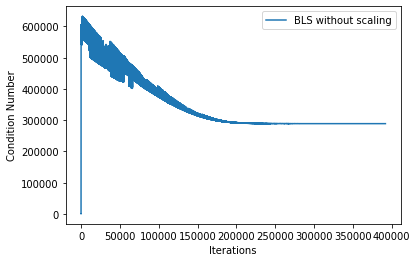

In [ ]:
plt.plot(cond_num_bls, label='BLS without scaling')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Condition Number')
#plt.yscale('log')

***Remarks :*** *We can find the optimal value of the x and the function only when we use BLS without scaling or when we use D which is the hessian inverve. When we use the diagonal matrix D which only has the inverse of diagonal of hessian, the number of iterations taken are very large, 698612. So this value of D does not work.*



We choose Q to be the hessian matrix and calculate the D matrix as folllows.

$D^k = (\nabla^2f(x^k))^{-1}$

Also, in the code, if the $\det(Q)$ is zero then we calculate $D^k$ by calculating the pseudo inverse of Q.

